<a href="https://colab.research.google.com/github/Pearlkakande/machinelearning/blob/main/models/models10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


MODEL TRAINING FOR GRAPH-BASED KNOWLEDGE DISTILLATION AND FEATURE LEARNING FOR BOOK RECOMMENDATIONS

Ten models are to be trained with model evaluation being handled by wandb

dataset= Eitanli/goodreads for the hugging face dataset library

SET UP

packages, dataset, wandb

In [1]:
# Install necessary packages (uncomment if needed)
!pip install datasets torch wandb sentence-transformers scikit-learn
!pip install torch-scatter torch-sparse torch-cluster torch-geometric -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
import torch
import torch.nn.functional as F
from torch_geometric.data import HeteroData, DataLoader
from torch_geometric.nn import GCNConv, GATConv  # and other layers as needed
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import wandb
import numpy as np
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1E

WANDB

In [ ]:
# (Global W&B login is fine to do once)
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: pearlkakande (pearlkakande-makerere-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

Dataset Loading

In [2]:
# Load the dataset from Hugging Face
dataset = load_dataset("Eitanli/goodreads")["train"]  # assume 'train' split
df = pd.DataFrame(dataset)
print(df.columns.tolist())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/737 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


goodreads_data.csv:   0%|          | 0.00/11.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating', 'Num_Ratings', 'URL']


GRAPH CONSTUCTION

Description embedding, spliting of dataset

the book, author and genre are nodes

edges show relationship and addding rating-based popularity as a node attribute or as edge weight

In [22]:
# Use a pre-trained sentence transformer to embed the book descriptions.
model_st = SentenceTransformer('all-MiniLM-L6-v2')
df['desc_emb'] = df['Description'].fillna("").apply(lambda x: model_st.encode(x))


# Split into train/test (e.g., 80/20 split by index for simplicity)
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

# Build a simple heterogeneous graph (using PyG's HeteroData):
def build_hetero_graph(df):
    data = HeteroData()

    # Create book nodes: use description embeddings as features.
    book_emb = np.stack(df['desc_emb'].values)
    data['book'].x = torch.tensor(book_emb, dtype=torch.float)

    # For authors and genres, create a mapping.
    authors = list(df['Author'].unique())
    genres = list(df['Genres'].unique())
    author2id = {a: i for i, a in enumerate(authors)}
    genre2id = {g: i for i, g in enumerate(genres)}

    # Create author nodes with one-hot features.
    data['author'].num_nodes = len(authors)
    data['author'].x = F.one_hot(torch.arange(len(authors)), num_classes=len(authors)).float()

    # Create genre nodes.
    data['genre'].num_nodes = len(genres)
    data['genre'].x = F.one_hot(torch.arange(len(genres)), num_classes=len(genres)).float()

    # Build edges: book -> author and book -> genre.
    book_ids = np.arange(len(df))
    author_ids = [author2id[a] for a in df['Author']]
    genre_ids = [genre2id[g] for g in df['Genres']]

    data['book', 'written_by', 'author'].edge_index = torch.tensor([book_ids, author_ids], dtype=torch.long)
    data['book', 'has_genre', 'genre'].edge_index = torch.tensor([book_ids, genre_ids], dtype=torch.long)

    # (Optional) Build book-to-book similarity edges based on cosine similarity between description embeddings:
    # For simplicity, here we add edges for pairs with similarity > 0.9.
    from sklearn.metrics.pairwise import cosine_similarity
    sim_matrix = cosine_similarity(book_emb)
    src, dst = np.where(sim_matrix > 0.9)
    # remove self-loops:
    mask = src != dst
    data['book', 'similar_to', 'book'].edge_index = torch.tensor([src[mask], dst[mask]], dtype=torch.long)

    # You can also include rating-based popularity as a node attribute or as edge weight.
    # For example, store ratings_count and average_rating in a separate tensor.
    #convert num ratings to int type for later manipulation
    df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '').astype(int)
    data['book'].ratings_count = torch.tensor(df['Num_Ratings'].values.astype(float), dtype=torch.float)
    data['book'].average_rating = torch.tensor(df['Avg_Rating'].values.astype(float), dtype=torch.float)

    return data

data = build_hetero_graph(train_df)  # build graph from training data

MODEL 1 LightGCN for Book Recommendation



Epoch 0: Loss=1151.8820, Acc=0.4813, Prec=0.0000, Rec=0.0000, F1=0.0000
Epoch 10: Loss=104.4055, Acc=0.5106, Prec=0.5054, Rec=1.0000, F1=0.6714
Epoch 20: Loss=117.1444, Acc=0.6120, Prec=0.5631, Rec=1.0000, F1=0.7205
      Model       Loss  Accuracy  Precision  Recall        F1
0  LightGCN  99.778412  0.712375    0.63482     1.0  0.776624
Confusion Matrix:
[[1699 2301]
 [   0 4000]]


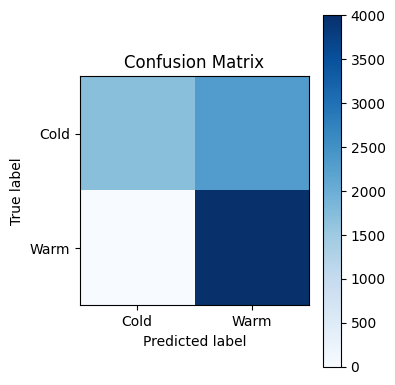

accuracy,▁▂▂▂▂▂▂▂▂▂▂▂▂▃▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
f1,▁▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████
loss,█▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
precision,▁▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████
recall,▁█████████████████████████████
Model,LightGCN
accuracy,0.71237
epoch,29
f1,0.77662
loss,99.77841


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch import nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import numpy as np

# Initialize wandb before training the model
wandb.init(project="book-model",    # Replace with your project name
           entity="pearlkakande-makerere-university",       # Replace with your wandb username or team name
           config={"model": "LightGCN", "epochs": 30, "learning_rate": 0.01})

# Assume wandb.login() was called in an earlier cell

class LightGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_layers=2):
        super(LightGCN, self).__init__()
        self.convs = nn.ModuleList()
        self.convs.append(GCNConv(in_channels, hidden_channels))
        for _ in range(num_layers - 1):
            self.convs.append(GCNConv(hidden_channels, hidden_channels))
        # Final linear layer: note we later concatenate popularity signal so input dims change.
        # Here we assume hidden_channels remains unchanged; adjust if needed.
        self.lin = nn.Linear(hidden_channels + 1, 2)  # binary classification: warm vs cold

    def forward(self, data):
        # Use only 'book' nodes for prediction.
        x = data['book'].x  # initial features from description embeddings
        for conv in self.convs:
            x = conv(x, data['book', 'similar_to', 'book'].edge_index)
            x = F.relu(x)
        # Concatenate popularity signal (ratings_count)
        ratings = data['book'].ratings_count.unsqueeze(1)
        x_cat = torch.cat([x, ratings], dim=1)
        out = self.lin(x_cat)
        return out, x_cat  # also return latent embedding for potential distillation

# Define warm items based on ratings_count > threshold.
threshold = train_df['Num_Ratings'].median()
labels = (train_df['Num_Ratings'] > threshold).astype(int).values
labels = torch.tensor(labels, dtype=torch.long)

# Set device and create model instance
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1 = LightGCN(in_channels=data['book'].x.size(1), hidden_channels=64, num_layers=2).to(device)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)

# Move data to device
data['book'].x = data['book'].x.to(device)
data['book', 'similar_to', 'book'].edge_index = data['book', 'similar_to', 'book'].edge_index.to(device)
data['book'].ratings_count = data['book'].ratings_count.to(device)
labels = labels.to(device)

# Training loop for 30 epochs
num_epochs = 30
model1.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    out, _ = model1(data)
    loss = F.cross_entropy(out, labels)
    loss.backward()
    optimizer.step()

    # Evaluate on training data (for demo purposes)
    preds = out.argmax(dim=1).cpu().numpy()
    truelabels = labels.cpu().numpy()
    acc = accuracy_score(truelabels, preds)
    prec = precision_score(truelabels, preds, zero_division=0)
    rec = recall_score(truelabels, preds, zero_division=0)
    f1 = f1_score(truelabels, preds, zero_division=0)

    wandb.log({
        "Model": "LightGCN",
        "epoch": epoch,
        "loss": loss.item(),
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1
    })

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss={loss.item():.4f}, Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")

# After training, create a summary table for the training set.
results = {"Model": "LightGCN", "Loss": loss.item(), "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}
print(pd.DataFrame([results]))

# Compute confusion matrix on training data
cm = confusion_matrix(truelabels, preds)
print("Confusion Matrix:")
print(cm)

# Optionally, log the confusion matrix as a plot to wandb:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Cold", "Warm"])
plt.yticks(tick_marks, ["Cold", "Warm"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.show()

# Finish the wandb run
wandb.finish()


MODEL 2 Graph Attention Network (GAT) for Books


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch import nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wandb

# Initialize wandb before training the model
wandb.init(project="book-model",    # Replace with your project name
           entity="pearlkakande-makerere-university",     # Replace with your wandb username or team name
           config={"model": "GATBook", "epochs": 30, "learning_rate": 0.01})

class GATBook(nn.Module):
    def __init__(self, in_channels, hidden_channels, heads=2, num_layers=2):
        super(GATBook, self).__init__()
        self.gat_layers = nn.ModuleList()
        self.gat_layers.append(GATConv(in_channels, hidden_channels, heads=heads))
        for _ in range(num_layers - 1):
            self.gat_layers.append(GATConv(hidden_channels * heads, hidden_channels, heads=heads))
        self.lin = nn.Linear(hidden_channels * heads + 1, 2)  # add ratings_count

    def forward(self, data):
        x = data['book'].x
        for gat in self.gat_layers:
            x = gat(x, data['book', 'similar_to', 'book'].edge_index)
            x = F.elu(x)
        ratings = data['book'].ratings_count.unsqueeze(1)
        x = torch.cat([x, ratings], dim=1)
        out = self.lin(x)
        return out

# Define warm items based on ratings_count > threshold.
threshold = train_df['Num_Ratings'].median()
labels = (train_df['Num_Ratings'] > threshold).astype(int).values
labels = torch.tensor(labels, dtype=torch.long)

# Set device and create model instance
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model2 = GATBook(in_channels=data['book'].x.size(1), hidden_channels=32, heads=2).to(device)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.005)

# Move data to device
data['book'].x = data['book'].x.to(device)
data['book', 'similar_to', 'book'].edge_index = data['book', 'similar_to', 'book'].edge_index.to(device)
data['book'].ratings_count = data['book'].ratings_count.to(device)
labels = labels.to(device)

# Training loop for 30 epochs
num_epochs = 30
model2.train()
for epoch in range(num_epochs):
    optimizer2.zero_grad()
    out = model2(data)
    loss = F.cross_entropy(out, labels)
    loss.backward()
    optimizer2.step()

    # Evaluate on training data (for demo purposes)
    preds = out.argmax(dim=1).cpu().numpy()
    truelabels = labels.cpu().numpy()
    acc = accuracy_score(truelabels, preds)
    prec = precision_score(truelabels, preds, zero_division=0)
    rec = recall_score(truelabels, preds, zero_division=0)
    f1 = f1_score(truelabels, preds, zero_division=0)

    # Compute confusion matrix
    cm = confusion_matrix(truelabels, preds)

    # Log metrics and confusion matrix to wandb
    wandb.log({
        "Model": "GATBook",
        "epoch": epoch,
        "loss": loss.item(),
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "confusion_matrix": wandb.plot.confusion_matrix(probs=None,
                                                        y_true=truelabels,
                                                        preds=preds,
                                                        class_names=["Cold", "Warm"])
    })

    if epoch % 10 == 0:
        print(f"GAT Epoch {epoch}: Loss={loss.item():.4f}, Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")

# After training, create a summary table for the training set.
results2 = {"Model": "GATBook", "Loss": loss.item(), "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}
print(pd.DataFrame([results2]))

# Finish the wandb run
wandb.finish()


GAT Epoch 0: Loss=66.6111, Acc=0.4999, Prec=0.0000, Rec=0.0000, F1=0.0000
GAT Epoch 10: Loss=60.7780, Acc=0.6148, Prec=0.5648, Rec=1.0000, F1=0.7219
GAT Epoch 20: Loss=63.3041, Acc=0.7324, Prec=0.6514, Rec=1.0000, F1=0.7889
     Model       Loss  Accuracy  Precision  Recall        F1
0  GATBook  47.351501   0.79275   0.706964     1.0  0.828329


accuracy,▁▁▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇████
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
f1,▁▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
loss,█▁▂▄▄▅▆▆▇▇▇▇█████████▇▇▇▇▇▆▆▆▅
precision,▁▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█████████
recall,▁█████████████████████████████
Model,GATBook
accuracy,0.79275
epoch,29
f1,0.82833
loss,47.3515


MODEL 3

Teacher Epoch 0: Loss=16.6825
Teacher Epoch 10: Loss=1.5315
Teacher Epoch 20: Loss=0.9638
Student Epoch 0: Total Loss=50.0902
Student Epoch 10: Total Loss=18.2100
Student Epoch 20: Total Loss=37.1157
           Model       Loss  Accuracy  Precision  Recall       F1
0  PGD (Student)  37.840187    0.7835   0.697837     1.0  0.82203
Confusion Matrix:
[[2268 1732]
 [   0 4000]]


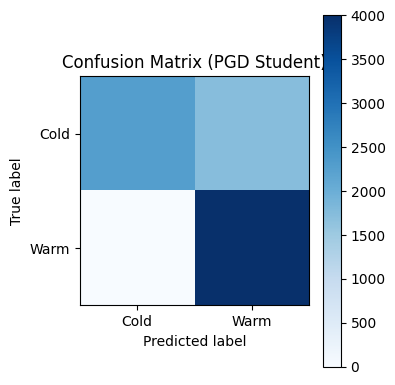

accuracy,▁▁▂▄▇▁▁▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████
class_loss,▂▂▁▁▁█▃▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂
distill_loss,██▇▇▆▅▄▃▂▂▁▁▂▂▂▃▂▂▂▁▁▁▁▁▁▁▁▁▁▂
epoch,▁▁▁▂▂▃▃▃▄▄▅▅▅▅▅▇▇▇▇█▁▁▁▂▂▃▃▃▃▃▅▅▅▅▆▆▇▇▇█
f1,▇▇▇▇█▁▁███████████████████████
loss,██▇▇▆▅▄▄▃▂▁▁▁▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
loss_total,▂▂▁▁▁█▃▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂
precision,▆▆▆▇█▁▁██▇████████████████████
recall,█████▁▁███████████████████████
Model,PGD_Student
accuracy,0.7835


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch import nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import numpy as np

# Initialize wandb before training the model
wandb.init(project="book-model",    # Replace with your project name
           entity="pearlkakande-makerere-university",  # your wandb username or team name
           config={"model": "PGD", "epochs": 30, "learning_rate": 0.01})

# Define Teacher and Student models for PGD
class TeacherGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(TeacherGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

    def forward(self, data):
        x = data['book'].x
        x = F.relu(self.conv1(x, data['book', 'similar_to', 'book'].edge_index))
        x = self.conv2(x, data['book', 'similar_to', 'book'].edge_index)
        return x

class StudentGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(StudentGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin = nn.Linear(hidden_channels + 1, 2)  # +1 for ratings_count feature

    def forward(self, data):
        x = data['book'].x
        x = F.relu(self.conv1(x, data['book', 'similar_to', 'book'].edge_index))
        x = self.conv2(x, data['book', 'similar_to', 'book'].edge_index)
        ratings = data['book'].ratings_count.unsqueeze(1)
        x_cat = torch.cat([x, ratings], dim=1)
        out = self.lin(x_cat)
        return out, x

# Define warm items based on ratings_count > threshold.
# Here we use 'Num_Ratings' from train_df for labeling and 'average_rating' as teacher target.
threshold = train_df['Num_Ratings'].median()
labels = (train_df['Num_Ratings'] > threshold).astype(int).values
labels = torch.tensor(labels, dtype=torch.long)

# Set device and create model instances
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
teacher = TeacherGCN(in_channels=data['book'].x.size(1), hidden_channels=64).to(device)
student = StudentGCN(in_channels=data['book'].x.size(1), hidden_channels=64).to(device)

optimizer_teacher = torch.optim.Adam(teacher.parameters(), lr=0.01)
optimizer_student = torch.optim.Adam(student.parameters(), lr=0.01)

# Move data and labels to device
data['book'].x = data['book'].x.to(device)
data['book', 'similar_to', 'book'].edge_index = data['book', 'similar_to', 'book'].edge_index.to(device)
data['book'].ratings_count = data['book'].ratings_count.to(device)
data['book'].average_rating = data['book'].average_rating.to(device)  # used as target for teacher
labels = labels.to(device)

num_epochs = 30

# --- Teacher Training ---
teacher.train()
for epoch in range(num_epochs):
    optimizer_teacher.zero_grad()
    teacher_emb = teacher(data)
    # Use a regression loss to predict average_rating as a proxy for CF signals.
    target = data['book'].average_rating.unsqueeze(1)
    # Here we take the mean over the embedding dimensions as a simple proxy.
    loss_teacher = F.mse_loss(teacher_emb.mean(dim=1, keepdim=True), target)
    loss_teacher.backward()
    optimizer_teacher.step()
    wandb.log({"Model": "PGD_Teacher", "epoch": epoch, "loss": loss_teacher.item()})
    if epoch % 10 == 0:
        print(f"Teacher Epoch {epoch}: Loss={loss_teacher.item():.4f}")

# Freeze teacher parameters
for param in teacher.parameters():
    param.requires_grad = False

# --- Student Training with Knowledge Distillation ---
student.train()
alpha = 0.7  # weight for distillation loss; 0.3 for ground truth classification
for epoch in range(num_epochs):
    optimizer_student.zero_grad()
    out_student, student_emb = student(data)
    with torch.no_grad():
        teacher_emb = teacher(data)
    # Distillation loss: MSE between student and teacher embeddings.
    loss_distill = F.mse_loss(student_emb, teacher_emb)
    # Classification loss: cross-entropy loss against warm/cold labels.
    loss_class = F.cross_entropy(out_student, labels)
    loss_total = alpha * loss_distill + (1 - alpha) * loss_class
    loss_total.backward()
    optimizer_student.step()

    preds = out_student.argmax(dim=1).cpu().numpy()
    truelabels = labels.cpu().numpy()
    acc = accuracy_score(truelabels, preds)
    prec = precision_score(truelabels, preds, zero_division=0)
    rec = recall_score(truelabels, preds, zero_division=0)
    f1 = f1_score(truelabels, preds, zero_division=0)

    wandb.log({"Model": "PGD_Student", "epoch": epoch, "loss_total": loss_total.item(),
               "distill_loss": loss_distill.item(), "class_loss": loss_class.item(),
               "accuracy": acc, "precision": prec, "recall": rec, "f1": f1})
    if epoch % 10 == 0:
        print(f"Student Epoch {epoch}: Total Loss={loss_total.item():.4f}")

results3 = {"Model": "PGD (Student)", "Loss": loss_total.item(), "Accuracy": acc,
            "Precision": prec, "Recall": rec, "F1": f1}
print(pd.DataFrame([results3]))

# Compute confusion matrix on training data using final predictions
cm = confusion_matrix(truelabels, preds)
print("Confusion Matrix:")
print(cm)

# Plot and log the confusion matrix to wandb
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (PGD Student)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Cold", "Warm"])
plt.yticks(tick_marks, ["Cold", "Warm"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.show()

# Finish the wandb run
wandb.finish()


MODEL 4 Hybrid Graph-based Model for Cold-Start Recommendations

Hybrid Epoch 0: Loss=55.8003
Hybrid Epoch 10: Loss=41.4788
Hybrid Epoch 20: Loss=73.1341
Confusion Matrix:
[[1968 2032]
 [   0 4000]]


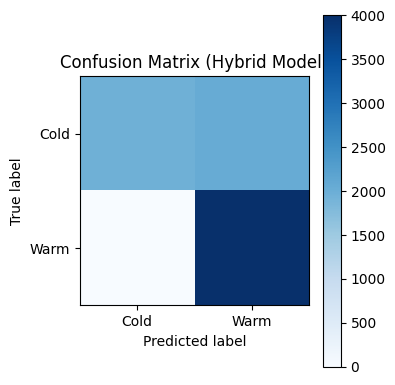

    Model       Loss  Accuracy  Precision  Recall        F1
0  Hybrid  73.800804     0.746    0.66313     1.0  0.797448


accuracy,▁▁▂▅▁▁▅▅▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇███
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
f1,▇▇▇▇▁▁█▇▇▇▇▇▇▇▇▇▇█████████████
loss,▂▁▁▁█▂▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
precision,▆▆▇▇▁▁▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█████████
recall,████▁▁████████████████████████
Model,Hybrid
accuracy,0.746
epoch,29
f1,0.79745
loss,73.8008


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch import nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import numpy as np

# Initialize wandb before training the model
wandb.init(project="book-model",
           entity="pearlkakande-makerere-university",
           config={"model": "Hybrid", "epochs": 30, "learning_rate": 0.005})

class HybridModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, text_dim):
        super(HybridModel, self).__init__()
        # Graph branch
        self.gcn1 = GCNConv(in_channels, hidden_channels)
        self.gcn2 = GCNConv(hidden_channels, hidden_channels)
        # Text branch
        self.fc_text = nn.Linear(text_dim, hidden_channels)
        # Fusion and final classifier (with popularity)
        self.fc_final = nn.Linear(hidden_channels * 2 + 1, 2)

    def forward(self, data):
        # Graph branch
        x_graph = F.relu(self.gcn1(data['book'].x, data['book', 'similar_to', 'book'].edge_index))
        x_graph = self.gcn2(x_graph, data['book', 'similar_to', 'book'].edge_index)
        # Text branch
        x_text = F.relu(self.fc_text(data['book'].x))
        # Combine graph, text, and popularity features
        ratings = data['book'].ratings_count.unsqueeze(1)
        x_comb = torch.cat([x_graph, x_text, ratings], dim=1)
        out = self.fc_final(x_comb)
        return out

# Define warm items based on ratings_count > threshold.
threshold = train_df['Num_Ratings'].median()
labels = (train_df['Num_Ratings'] > threshold).astype(int).values
labels = torch.tensor(labels, dtype=torch.long)

# Set device and create model instance
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model4 = HybridModel(in_channels=data['book'].x.size(1), hidden_channels=32, text_dim=data['book'].x.size(1)).to(device)
optimizer4 = torch.optim.Adam(model4.parameters(), lr=0.005)

# Move data to device
data['book'].x = data['book'].x.to(device)
data['book', 'similar_to', 'book'].edge_index = data['book', 'similar_to', 'book'].edge_index.to(device)
data['book'].ratings_count = data['book'].ratings_count.to(device)
labels = labels.to(device)

# Training loop for 30 epochs
num_epochs = 30
model4.train()
for epoch in range(num_epochs):
    optimizer4.zero_grad()
    out = model4(data)
    loss = F.cross_entropy(out, labels)
    loss.backward()
    optimizer4.step()

    # Evaluate on training data
    preds = out.argmax(dim=1).cpu().numpy()
    truelabels = labels.cpu().numpy()
    acc = accuracy_score(truelabels, preds)
    prec = precision_score(truelabels, preds, zero_division=0)
    rec = recall_score(truelabels, preds, zero_division=0)
    f1 = f1_score(truelabels, preds, zero_division=0)

    wandb.log({
        "Model": "Hybrid",
        "epoch": epoch,
        "loss": loss.item(),
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1
    })

    if epoch % 10 == 0:
        print(f"Hybrid Epoch {epoch}: Loss={loss.item():.4f}")

# Compute confusion matrix
cm = confusion_matrix(truelabels, preds)
print("Confusion Matrix:")
print(cm)

# Plot and log the confusion matrix as an image to wandb
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Hybrid Model)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Cold", "Warm"])
plt.yticks(tick_marks, ["Cold", "Warm"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.show()

results4 = {"Model": "Hybrid", "Loss": loss.item(), "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}
print(pd.DataFrame([results4]))

# Finish the wandb run
wandb.finish()


MODEL 5 Knowledge Distillation with ALDI Framework

<ipython-input-18-23592702bdc8>:66: UserWarning: Using a target size (torch.Size([8000, 1])) that is different to the input size (torch.Size([8000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_teacher = F.mse_loss(emb.mean(dim=1), target)


ALDI Teacher Epoch 0: Loss=16.6653
ALDI Teacher Epoch 10: Loss=11.1444
ALDI Teacher Epoch 20: Loss=6.9988
ALDI Student Epoch 0: Total Loss=479.8659
ALDI Student Epoch 10: Total Loss=41.5132
ALDI Student Epoch 20: Total Loss=42.9137
            Model       Loss  Accuracy  Precision  Recall        F1
0  ALDI (Student)  33.467648  0.783375   0.697715     1.0  0.821946
Confusion Matrix:
[[2267 1733]
 [   0 4000]]


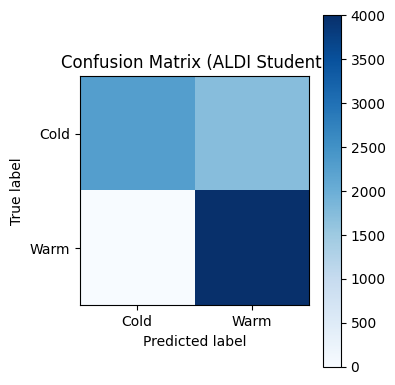

accuracy,▁▃▃▃▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇█████
class_loss,█▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
distill_loss,██▇▇▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▇▇▇▇█▁▁▂▂▃▃▃▃▄▄▅▅▅▆▆▇▇▇█
f1,▁▇▇▇▇▇▇▇▇▇▇▇██████████████████
loss,██▇▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁
loss_total,█▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
precision,▁▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
recall,▁█████████████████████████████
Model,ALDI_Student
accuracy,0.78338


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch import nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import numpy as np

# Initialize wandb before training the model
wandb.init(project="book-model",    # Replace with your project name
           entity="pearlkakande-makerere-university",  # your wandb username or team name
           config={"model": "ALDI", "epochs": 30, "learning_rate": 0.01})

class ALDITeacher(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(ALDITeacher, self).__init__()
        self.conv = GCNConv(in_channels, hidden_channels)

    def forward(self, data):
        x = self.conv(data['book'].x, data['book', 'similar_to', 'book'].edge_index)
        return x

class ALDIStudent(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(ALDIStudent, self).__init__()
        self.conv = GCNConv(in_channels, hidden_channels)
        self.lin = nn.Linear(hidden_channels + 1, 2)  # +1 for ratings_count

    def forward(self, data):
        x = self.conv(data['book'].x, data['book', 'similar_to', 'book'].edge_index)
        ratings = data['book'].ratings_count.unsqueeze(1)
        x_cat = torch.cat([x, ratings], dim=1)
        out = self.lin(x_cat)
        return out, x

# Create model instances
teacher_aldi = ALDITeacher(in_channels=data['book'].x.size(1), hidden_channels=64).to(device)
student_aldi = ALDIStudent(in_channels=data['book'].x.size(1), hidden_channels=64).to(device)

optimizer_teacher_aldi = torch.optim.Adam(teacher_aldi.parameters(), lr=0.01)
optimizer_student_aldi = torch.optim.Adam(student_aldi.parameters(), lr=0.01)

# Define warm items based on ratings_count > threshold.
threshold = train_df['Num_Ratings'].median()
labels = (train_df['Num_Ratings'] > threshold).astype(int).values
labels = torch.tensor(labels, dtype=torch.long)

# Move data and labels to device
data['book'].x = data['book'].x.to(device)
data['book', 'similar_to', 'book'].edge_index = data['book', 'similar_to', 'book'].edge_index.to(device)
data['book'].ratings_count = data['book'].ratings_count.to(device)
data['book'].average_rating = data['book'].average_rating.to(device)
labels = labels.to(device)

num_epochs = 30

# --- Teacher Training ---
teacher_aldi.train()
for epoch in range(num_epochs):
    optimizer_teacher_aldi.zero_grad()
    emb = teacher_aldi(data)
    # Use MSE loss to predict the average rating as a proxy for CF signals.
    target = data['book'].average_rating.unsqueeze(1)
    loss_teacher = F.mse_loss(emb.mean(dim=1), target)
    loss_teacher.backward()
    optimizer_teacher_aldi.step()
    wandb.log({"Model": "ALDI_Teacher", "epoch": epoch, "loss": loss_teacher.item()})
    if epoch % 10 == 0:
        print(f"ALDI Teacher Epoch {epoch}: Loss={loss_teacher.item():.4f}")

# Freeze teacher parameters
for param in teacher_aldi.parameters():
    param.requires_grad = False

# --- Student Training with Knowledge Distillation ---
student_aldi.train()
alpha = 0.6  # weight for distillation loss; 0.4 for ground truth classification
for epoch in range(num_epochs):
    optimizer_student_aldi.zero_grad()
    out_student, emb_student = student_aldi(data)
    with torch.no_grad():
        teacher_emb = teacher_aldi(data)
    # Distillation loss: MSE between student and teacher embeddings.
    loss_distill = F.mse_loss(emb_student, teacher_emb)
    # Classification loss: cross-entropy loss against warm/cold labels.
    loss_class = F.cross_entropy(out_student, labels)
    loss_total = alpha * loss_distill + (1 - alpha) * loss_class
    loss_total.backward()
    optimizer_student_aldi.step()

    preds = out_student.argmax(dim=1).cpu().numpy()
    truelabels = labels.cpu().numpy()
    acc = accuracy_score(truelabels, preds)
    prec = precision_score(truelabels, preds, zero_division=0)
    rec = recall_score(truelabels, preds, zero_division=0)
    f1 = f1_score(truelabels, preds, zero_division=0)

    wandb.log({"Model": "ALDI_Student", "epoch": epoch, "loss_total": loss_total.item(),
               "distill_loss": loss_distill.item(), "class_loss": loss_class.item(),
               "accuracy": acc, "precision": prec, "recall": rec, "f1": f1})

    if epoch % 10 == 0:
        print(f"ALDI Student Epoch {epoch}: Total Loss={loss_total.item():.4f}")

results5 = {"Model": "ALDI (Student)", "Loss": loss_total.item(), "Accuracy": acc,
            "Precision": prec, "Recall": rec, "F1": f1}
print(pd.DataFrame([results5]))

# Compute confusion matrix on training data
cm = confusion_matrix(truelabels, preds)
print("Confusion Matrix:")
print(cm)

# Plot and log the confusion matrix as an image to wandb
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (ALDI Student)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Cold", "Warm"])
plt.yticks(tick_marks, ["Cold", "Warm"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.show()

# Finish the wandb run
wandb.finish()


MODEL 6 Meta-Learning on Knowledge Graph (MetaKG)

MetaKG Epoch 0: Loss=105.3194, Acc=0.5320
MetaKG Epoch 10: Loss=13.1248, Acc=0.7520
MetaKG Epoch 20: Loss=33.9277, Acc=0.7640
Confusion Matrix:
[[3819 3710]
 [ 237 7234]]


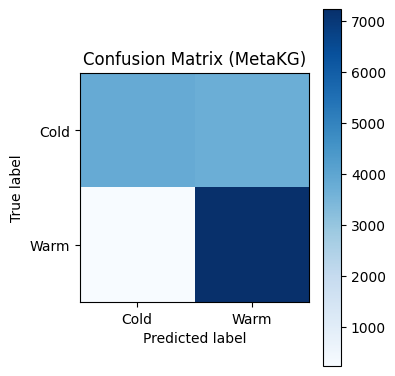

    Model       Loss
0  MetaKG  14.582858


accuracy,▁▁▁▃▃▃▆▁█▅▅▄▆▅▅▄▅▅▅▅▅▅▆▆▇▇▆▇▇▇
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
f1,▆▆▆▇▆▇▇▁█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██▇███
loss,▃▃▃▂▂▂▁█▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▁▁
precision,▅▅▅▆▆▆▇▁█▇▇▆▇▇▇▆▇▆▇▆▇▇▇▇▇▇▇▇▇█
recall,███████▁██████████████████████
Model,MetaKG
accuracy,0.872
epoch,29
f1,0.8853
loss,14.58286


In [23]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch import nn
from torch_geometric.utils import subgraph
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import numpy as np

# Initialize wandb before training the model
wandb.init(project="book-model",    # Replace with your project name
           entity="pearlkakande-makerere-university",  # Replace with your wandb username or team name
           config={"model": "MetaKG", "epochs": 30, "learning_rate": 0.01})

# Define warm items based on ratings_count > threshold.
threshold = train_df['Num_Ratings'].median()
labels = (train_df['Num_Ratings'] > threshold).astype(int).values
labels = torch.tensor(labels, dtype=torch.long)

class MetaGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(MetaGNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin = nn.Linear(hidden_channels + 1, 2)

    def forward(self, data):
        x = F.relu(self.conv1(data['book'].x, data['book', 'similar_to', 'book'].edge_index))
        x = self.conv2(x, data['book', 'similar_to', 'book'].edge_index)
        ratings = data['book'].ratings_count.unsqueeze(1)
        x_cat = torch.cat([x, ratings], dim=1)
        out = self.lin(x_cat)
        return out, x

# Sampling function for meta-learning tasks with proper edge re-indexing
def sample_task(data, labels, task_size=100):
    idx = torch.randperm(data['book'].x.size(0))[:task_size]
    task_data = data.clone()
    # Subset node features and ratings
    task_data['book'].x = data['book'].x[idx]
    task_data['book'].ratings_count = data['book'].ratings_count[idx]
    # Adjust edge indices for the sampled subgraph using subgraph utility
    orig_edge_index = data['book', 'similar_to', 'book'].edge_index
    new_edge_index, _ = subgraph(idx, orig_edge_index, relabel_nodes=True, num_nodes=data['book'].x.size(0))
    task_data['book', 'similar_to', 'book'].edge_index = new_edge_index
    return task_data, labels[idx]

# Set device and create model instance
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
meta_model = MetaGNN(in_channels=data['book'].x.size(1), hidden_channels=64).to(device)
meta_optimizer = torch.optim.Adam(meta_model.parameters(), lr=0.005)

# Move data and labels to device
data['book'].x = data['book'].x.to(device)
data['book', 'similar_to', 'book'].edge_index = data['book', 'similar_to', 'book'].edge_index.to(device)
data['book'].ratings_count = data['book'].ratings_count.to(device)
labels = labels.to(device)

meta_epochs = 30
meta_tasks = 5  # number of tasks per epoch

meta_model.train()
all_preds, all_labels = [], []
for epoch in range(meta_epochs):
    meta_loss = 0
    epoch_preds, epoch_labels = [], []

    for _ in range(meta_tasks):
        task_data, task_labels = sample_task(data, labels, task_size=100)
        task_data['book'].x = task_data['book'].x.to(device)
        task_data['book', 'similar_to', 'book'].edge_index = task_data['book', 'similar_to', 'book'].edge_index.to(device)
        task_data['book'].ratings_count = task_data['book'].ratings_count.to(device)
        task_labels = task_labels.to(device)

        out, _ = meta_model(task_data)
        loss = F.cross_entropy(out, task_labels)
        meta_loss += loss

        preds = out.argmax(dim=1).cpu().numpy()
        true_labels = task_labels.cpu().numpy()
        epoch_preds.extend(preds)
        epoch_labels.extend(true_labels)

    meta_loss /= meta_tasks
    meta_optimizer.zero_grad()
    meta_loss.backward()
    meta_optimizer.step()

    # Compute metrics for the current epoch
    acc = accuracy_score(epoch_labels, epoch_preds)
    prec = precision_score(epoch_labels, epoch_preds, zero_division=0)
    rec = recall_score(epoch_labels, epoch_preds, zero_division=0)
    f1 = f1_score(epoch_labels, epoch_preds, zero_division=0)

    wandb.log({"Model": "MetaKG", "epoch": epoch, "loss": meta_loss.item(),
               "accuracy": acc, "precision": prec, "recall": rec, "f1": f1})

    if epoch % 10 == 0:
        print(f"MetaKG Epoch {epoch}: Loss={meta_loss.item():.4f}, Acc={acc:.4f}")

    all_preds.extend(epoch_preds)
    all_labels.extend(epoch_labels)

# Compute confusion matrix on training data (across all tasks)
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

# Plot and log the confusion matrix as an image to wandb
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (MetaKG)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Cold", "Warm"])
plt.yticks(tick_marks, ["Cold", "Warm"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.show()

results6 = {"Model": "MetaKG", "Loss": meta_loss.item()}
print(pd.DataFrame([results6]))

wandb.finish()


MODEL 7Graph Neural Network with Pseudo-Labelling over Knowledge Graph

PseudoLabelGNN Epoch 0: Loss=444.9424
PseudoLabelGNN Epoch 10: Loss=0.0993
PseudoLabelGNN Epoch 20: Loss=0.0867
            Model      Loss  Accuracy  Precision  Recall        F1
0  PseudoLabelGNN  0.067424   0.97375   0.972317     1.0  0.985964
Confusion Matrix:
[[ 414  210]
 [   0 7376]]


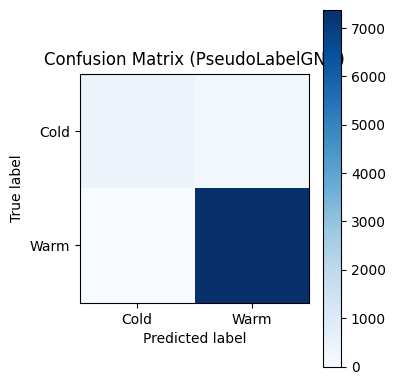

accuracy,▁█████████████████████████████
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
f1,▁█████████████████████████████
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
precision,▁█████████████████████████████
recall,▁█████████████████████████████
Model,PseudoLabelGNN
accuracy,0.97375
epoch,29
f1,0.98596
loss,0.06742


In [24]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch import nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import numpy as np

# Initialize wandb before training the model
wandb.init(project="book-model",    # Replace with your project name
           entity="pearlkakande-makerere-university",  # Replace with your wandb username or team name
           config={"model": "PseudoLabelGNN", "epochs": 30, "learning_rate": 0.005})

# Define warm items based on ratings_count > threshold.
threshold = train_df['Num_Ratings'].median()
labels = (train_df['Num_Ratings'] > threshold).astype(int).values
labels = torch.tensor(labels, dtype=torch.long)

class PseudoLabelGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(PseudoLabelGNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin = nn.Linear(hidden_channels + 1, 2)

    def forward(self, data):
        x = F.relu(self.conv1(data['book'].x, data['book', 'similar_to', 'book'].edge_index))
        x = self.conv2(x, data['book', 'similar_to', 'book'].edge_index)
        ratings = data['book'].ratings_count.unsqueeze(1)
        x_cat = torch.cat([x, ratings], dim=1)
        out = self.lin(x_cat)
        return out

model7 = PseudoLabelGNN(in_channels=data['book'].x.size(1), hidden_channels=64).to(device)
optimizer7 = torch.optim.Adam(model7.parameters(), lr=0.005)

# In each epoch, we generate pseudo-labels for books with low ratings_count.
def generate_pseudo_labels(data, threshold_value=20):
    # For simplicity, label as 1 (warm) if ratings_count > threshold_value else 0.
    pseudo = (data['book'].ratings_count > threshold_value).long()
    return pseudo

model7.train()
for epoch in range(num_epochs):
    optimizer7.zero_grad()
    pseudo_labels = generate_pseudo_labels(data)  # using a fixed threshold of 20
    out = model7(data)
    loss = F.cross_entropy(out, pseudo_labels.to(device))
    loss.backward()
    optimizer7.step()

    preds = out.argmax(dim=1).cpu().numpy()
    true_labels = pseudo_labels.cpu().numpy()
    acc = accuracy_score(true_labels, preds)
    prec = precision_score(true_labels, preds, zero_division=0)
    rec = recall_score(true_labels, preds, zero_division=0)
    f1 = f1_score(true_labels, preds, zero_division=0)

    wandb.log({
        "Model": "PseudoLabelGNN",
        "epoch": epoch,
        "loss": loss.item(),
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1
    })

    if epoch % 10 == 0:
        print(f"PseudoLabelGNN Epoch {epoch}: Loss={loss.item():.4f}")

results7 = {"Model": "PseudoLabelGNN", "Loss": loss.item(), "Accuracy": acc,
            "Precision": prec, "Recall": rec, "F1": f1}
print(pd.DataFrame([results7]))

# Compute confusion matrix on training data
cm = confusion_matrix(true_labels, preds)
print("Confusion Matrix:")
print(cm)

# Plot and log the confusion matrix as a plot to wandb
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (PseudoLabelGNN)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Cold", "Warm"])
plt.yticks(tick_marks, ["Cold", "Warm"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.show()

# Finish the wandb run
wandb.finish()


MODEL 8  BERT-based Content Feature Learning

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import wandb
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Initialize wandb before training the model
wandb.init(project="book-model",    # Replace with your project name
           entity="pearlkakande-makerere-university",  # Replace with your wandb username or team name
           config={"model": "BERT", "epochs": 30, "learning_rate": 5e-5})

# Define warm items based on ratings_count > threshold.
# Here, we define a threshold based on the median of Num_Ratings in the training set.
threshold = train_df['Num_Ratings'].median()

# Fix the error by converting test_df['Num_Ratings'] to string before replacing commas.
test_df['Num_Ratings'] = test_df['Num_Ratings'].astype(str).str.replace(',', '').astype(float)

# Prepare the dataset for transformers (we assume Description and labels are available)
train_texts = train_df['Description'].fillna("").tolist()
train_labels = ((train_df['Num_Ratings'] > threshold).astype(int)).tolist()
test_texts = test_df['Description'].fillna("").tolist()
test_labels = ((test_df['Num_Ratings'] > threshold).astype(int)).tolist()

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples, truncation=True, padding="max_length", max_length=128)

# Tokenize texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

import datasets as ds
train_dataset = ds.Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})
test_dataset = ds.Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

# Load the pre-trained model for sequence classification.
model8 = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=30,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    logging_dir='./logs',
    report_to="wandb"  # Logs metrics to wandb
)

# Define a function to compute metrics
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    acc = accuracy_score(p.label_ids, preds)
    prec = precision_score(p.label_ids, preds, zero_division=0)
    rec = recall_score(p.label_ids, preds, zero_division=0)
    f1 = f1_score(p.label_ids, preds, zero_division=0)
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

from transformers import Trainer

trainer = Trainer(
    model=model8,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()
eval_results = trainer.evaluate()
print(eval_results)

# Compute predictions for the confusion matrix
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)
cm = confusion_matrix(test_labels, preds)
print("Confusion Matrix:")
print(cm)

# Plot and log the confusion matrix as a plot to wandb
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (BERT)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Non-fiction", "Fiction"])
plt.yticks(tick_marks, ["Non-fiction", "Fiction"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.show()

wandb.finish()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.644400,0.573413,0.692000,0.673362,0.761106,0.714551
2,0.451300,0.601066,0.698500,0.730337,0.641658,0.683132
3,0.219900,0.936959,0.685000,0.698035,0.666338,0.681818


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.644400,0.573413,0.692000,0.673362,0.761106,0.714551
2,0.451300,0.601066,0.698500,0.730337,0.641658,0.683132
3,0.219900,0.936959,0.685000,0.698035,0.666338,0.681818


MODEL 9  Deep Genre Classification via Feature Learning

              precision    recall  f1-score    support
0              0.715743  0.602454  0.654231   815.0000
1              0.753425  0.835443  0.792317  1185.0000
accuracy       0.740500  0.740500  0.740500     0.7405
macro avg      0.734584  0.718949  0.723274  2000.0000
weighted avg   0.738070  0.740500  0.736047  2000.0000
Confusion Matrix:
[[491 324]
 [195 990]]


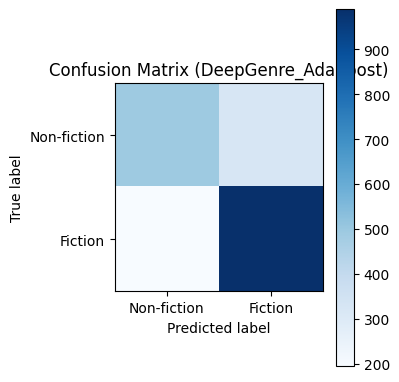

Model,DeepGenre_AdaBoost


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import numpy as np

# Initialize wandb before training the model
wandb.init(project="book-model",    # Replace with your project name
           entity="pearlkakande-makerere-university",  # Replace with your wandb username or team name
           config={"model": "DeepGenre_AdaBoost", "epochs": 30, "learning_rate": 0.01})

# The classification target for Deep Genre Classification is based on genre,
# so a warm-items label based on ratings_count is not necessary.
# However, if you need to define warm items for any reason, you could do:
# threshold = train_df['Num_Ratings'].median()
# warm_labels = (train_df['Num_Ratings'] > threshold).astype(int).values
# warm_labels = torch.tensor(warm_labels, dtype=torch.long)

# Prepare the dataset for transformers-based genre classification
# Here, we perform a binary classification: Fiction vs. Non-fiction.
# Label as 1 if the genre contains "Fiction", else 0.
train_texts = train_df['Description'].fillna("").tolist()
train_genres = train_df['Genres'].apply(lambda g: 1 if "Fiction" in g else 0).tolist()
test_texts = test_df['Description'].fillna("").tolist()
test_genres = test_df['Genres'].apply(lambda g: 1 if "Fiction" in g else 0).tolist()

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Reduce dimensions using PCA
pca = PCA(n_components=100)
X_train_reduced = pca.fit_transform(X_train.toarray())
X_test_reduced = pca.transform(X_test.toarray())

# Train AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=50)
clf.fit(X_train_reduced, train_genres)

# Predict on test set
preds = clf.predict(X_test_reduced)

# Compute and log classification report
report = classification_report(test_genres, preds, output_dict=True)
wandb.log({"Model": "DeepGenre_AdaBoost", "classification_report": report})
print(pd.DataFrame(report).transpose())

# Compute confusion matrix
cm = confusion_matrix(test_genres, preds)
print("Confusion Matrix:")
print(cm)

# Plot and log the confusion matrix to wandb
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (DeepGenre_AdaBoost)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Non-fiction", "Fiction"])
plt.yticks(tick_marks, ["Non-fiction", "Fiction"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.show()

wandb.finish()


MODEL 10 Multi-View Graph Neural Network

MultiViewGNN Epoch 0: Loss=77.4251
MultiViewGNN Epoch 10: Loss=25.4374
MultiViewGNN Epoch 20: Loss=43.6840
          Model       Loss  Accuracy  Precision  Recall       F1
0  MultiViewGNN  39.920635    0.7455   0.662691     1.0  0.79713
Confusion Matrix:
[[1964 2036]
 [   0 4000]]


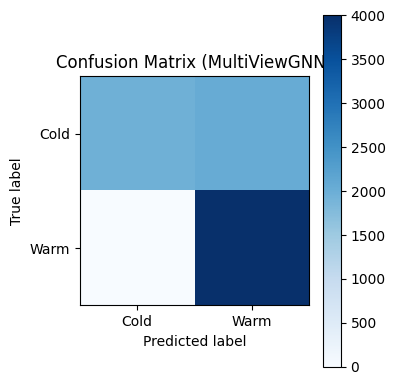

accuracy,▁▁▂▃▅▁█▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇████
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
eval/accuracy,▁
eval/f1,▁
eval/loss,▁
eval/precision,▁
eval/recall,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
f1,▇▇▇▇▇▁████████████████████████


In [33]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch import nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import wandb
import matplotlib.pyplot as plt
import numpy as np

# Initialize wandb before training the model
wandb.init(project="book-model",    # Replace with your project name
           entity="pearlkakande-makerere-university",  # Replace with your wandb username or team name
           config={"model": "MultiViewGNN", "epochs": 30, "learning_rate": 0.005})

# Define warm items based on ratings_count > threshold.
threshold = train_df['Num_Ratings'].median()
labels = (train_df['Num_Ratings'] > threshold).astype(int).values
labels = torch.tensor(labels, dtype=torch.long)

class MultiViewGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(MultiViewGNN, self).__init__()
        # Collaborative view branch (using popularity)
        self.collab_conv = GCNConv(in_channels, hidden_channels)
        # Content view branch
        self.content_conv = GCNConv(in_channels, hidden_channels)
        # Fusion: concatenate both views and popularity, then classify
        self.fusion_lin = nn.Linear(hidden_channels * 2 + 1, 2)

    def forward(self, data):
        # Collaborative view: use the same edge_index for demo purposes
        x_collab = F.relu(self.collab_conv(data['book'].x, data['book', 'similar_to', 'book'].edge_index))
        # Content view: here, for simplicity, we use the same input features
        x_content = F.relu(self.content_conv(data['book'].x, data['book', 'similar_to', 'book'].edge_index))
        # Fusion: concatenate both views and the popularity signal
        ratings = data['book'].ratings_count.unsqueeze(1)
        x_fused = torch.cat([x_collab, x_content, ratings], dim=1)
        out = self.fusion_lin(x_fused)
        return out, x_collab, x_content

# Set device and create model instance
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model10 = MultiViewGNN(in_channels=data['book'].x.size(1), hidden_channels=32).to(device)
optimizer10 = torch.optim.Adam(model10.parameters(), lr=0.005)

# Move data and labels to device
data['book'].x = data['book'].x.to(device)
data['book', 'similar_to', 'book'].edge_index = data['book', 'similar_to', 'book'].edge_index.to(device)
data['book'].ratings_count = data['book'].ratings_count.to(device)
labels = labels.to(device)

# Training loop for 30 epochs
num_epochs = 30
model10.train()
for epoch in range(num_epochs):
    optimizer10.zero_grad()
    out, view1, view2 = model10(data)
    # Classification loss
    loss_class = F.cross_entropy(out, labels)
    # Alignment loss: force the two views to be close (MSE)
    loss_align = F.mse_loss(view1, view2)
    loss_total = loss_class + 0.5 * loss_align
    loss_total.backward()
    optimizer10.step()

    preds = out.argmax(dim=1).cpu().numpy()
    true_labels = labels.cpu().numpy()
    acc = accuracy_score(true_labels, preds)
    prec = precision_score(true_labels, preds, zero_division=0)
    rec = recall_score(true_labels, preds, zero_division=0)
    f1 = f1_score(true_labels, preds, zero_division=0)

    wandb.log({"Model": "MultiViewGNN", "epoch": epoch, "loss": loss_total.item(),
               "accuracy": acc, "precision": prec, "recall": rec, "f1": f1})

    if epoch % 10 == 0:
        print(f"MultiViewGNN Epoch {epoch}: Loss={loss_total.item():.4f}")

results10 = {"Model": "MultiViewGNN", "Loss": loss_total.item(), "Accuracy": acc,
             "Precision": prec, "Recall": rec, "F1": f1}
print(pd.DataFrame([results10]))

# Compute confusion matrix on training data
cm = confusion_matrix(true_labels, preds)
print("Confusion Matrix:")
print(cm)

# Plot and log the confusion matrix as a plot to wandb
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (MultiViewGNN)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Cold", "Warm"])
plt.yticks(tick_marks, ["Cold", "Warm"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.show()

# Finish the wandb run
wandb.finish()
